# A general debuggings notebook for batch data 

In [1]:
import os
import sys
import time
import h5py
import numpy as np
from glob import glob
from scipy.interpolate import RegularGridInterpolator
from datetime import datetime, timedelta

sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## GFS quality

In [3]:
with h5py.File('/glade/campaign/cisl/aiml/ksha/GFS/GFS_APCP_2023_ini00_f18.hdf', 'r') as h5io:
    APCP = h5io['APCP'][...]

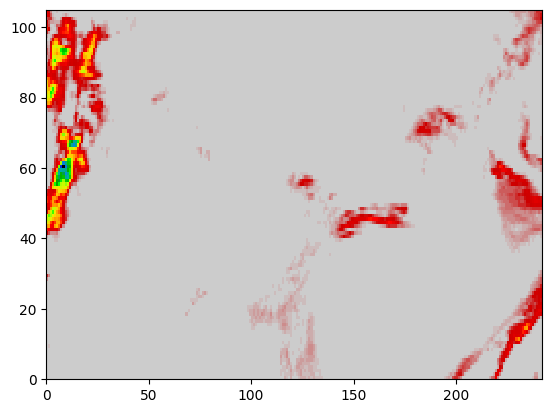

In [10]:
plt.pcolormesh(APCP[6, ...], cmap=plt.cm.nipy_spectral_r)

In [3]:
with h5py.File('/glade/campaign/cisl/aiml/ksha/GFS/GFS_2023_ini12_f09.hdf', 'r') as h5io:
    APCP = h5io['APCP'][...]
    CAPE = h5io['CAPE'][...]
    PWAT = h5io['PWAT'][...]
    T800 = h5io['T800'][...]
    U800 = h5io['U800'][...]
    V800 = h5io['V800'][...]
    RH800 = h5io['RH800'][...]

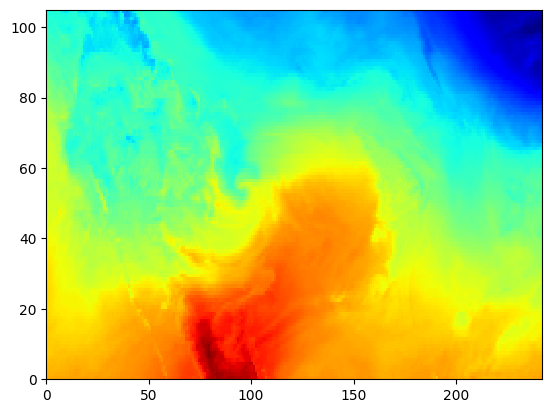

In [20]:
plt.pcolormesh(T800[10, ...], cmap=plt.cm.jet)

## GFS batch quality

In [5]:
BATCH_dir = '/glade/campaign/cisl/aiml/ksha/BATCH_GFS_MRMS/'
filename = 'GFS_y2021_ini18_lead15_dt0364_ix120_iy360.npy'

In [11]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_01 = h5io['lon_01'][...]
    lat_01 = h5io['lat_01'][...]
    elev_01 = h5io['elev_01'][...]
    lon_GFS = h5io['lon_GFS'][...]
    lat_GFS = h5io['lat_GFS'][...]

In [19]:
with h5py.File('/glade/campaign/cisl/aiml/ksha/GFS/MRMS_y{}.hdf'.format(2022), 'r') as h5io:
    MRMS_base = h5io['MRMS'][...]

In [21]:
with h5py.File(save_dir+'MRMS_ERA5_domain.hdf', 'r') as h5io:
    # lon_ERA5 = h5io['lon_ERA5'][...]
    # lat_ERA5 = h5io['lat_ERA5'][...]
    lon_MRMS = h5io['lon_MRMS'][...]
    lat_MRMS = h5io['lat_MRMS'][...]

In [6]:
data_temp = np.load(BATCH_dir+filename)

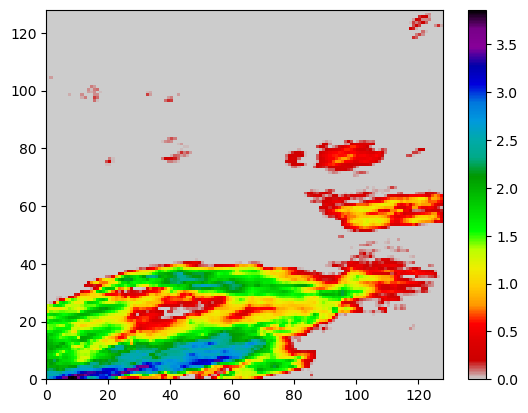

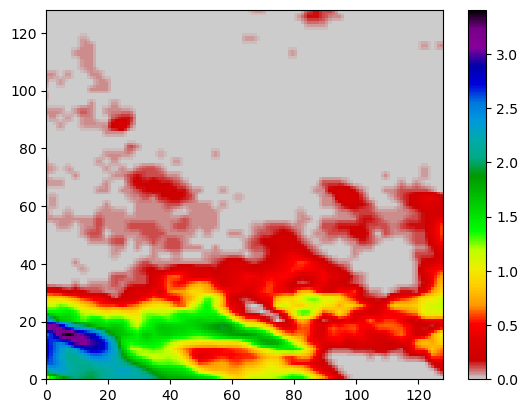

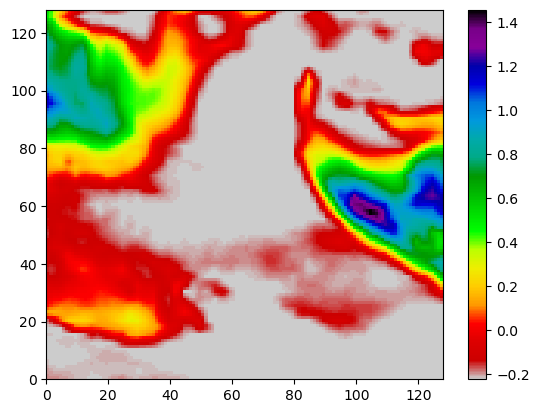

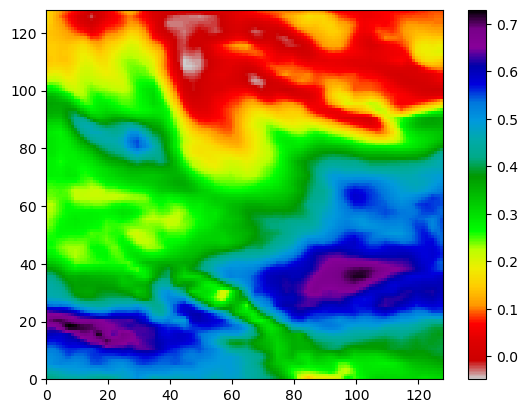

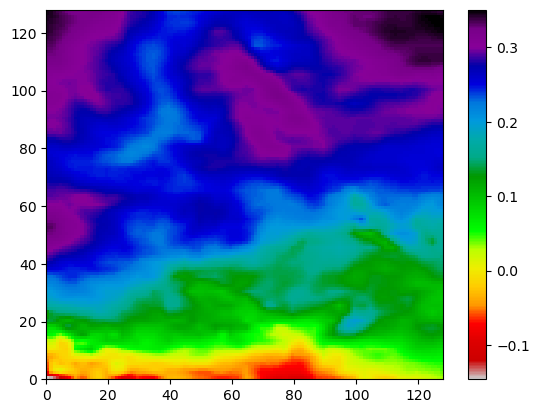

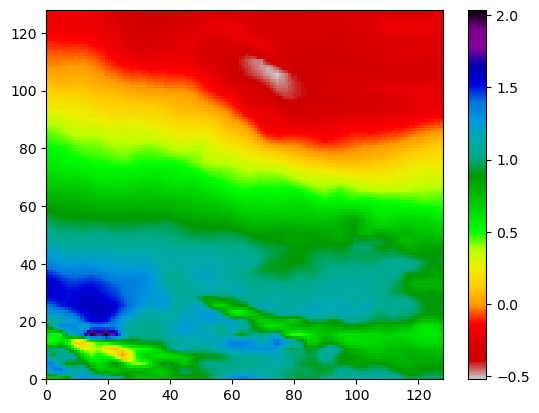

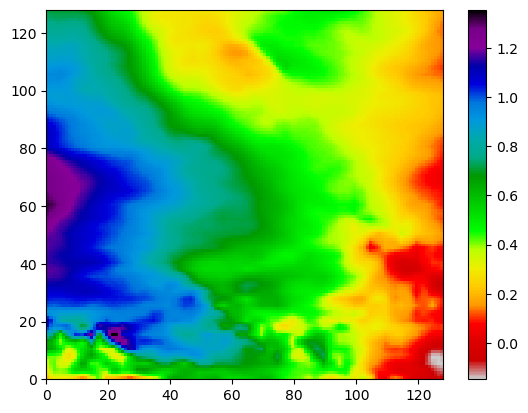

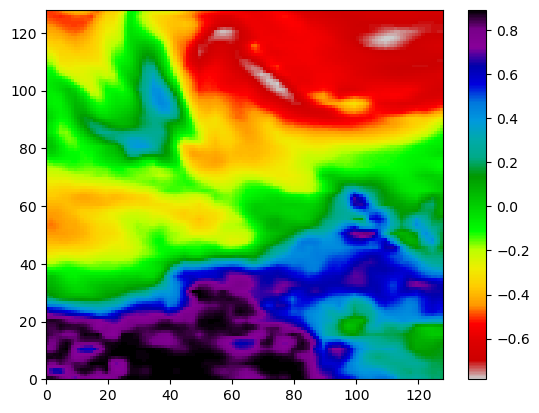

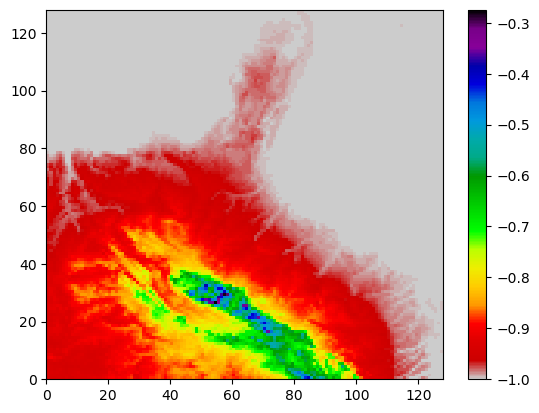

In [10]:
for i in range(9):
    plt.figure()
    plt.pcolormesh(data_temp[0, ..., i], cmap=plt.cm.nipy_spectral_r)
    plt.colorbar()

### VQ-VAE quality

In [3]:
BATCH_dir = '/glade/campaign/cisl/aiml/ksha/BATCH_Diffusion/'

# preparing training batches
filenames = np.array(sorted(glob(BATCH_dir+'*.npy')))

In [4]:
input_shape = (32, 32, 8) # the tensor shape of reverse diffusion input
gfs_shape = (16, 16, 256) # the tensor shape of GFS embeddings

In [5]:
len(filenames)

3264

In [6]:
L_valid = 3000

In [7]:
L = len(filenames)
filename_valid = filenames[:][:L_valid]
filename_train = list(set(filenames) - set(filename_valid))

L_train = len(filename_train)

Y_valid = np.empty((L_valid,)+input_shape)
X_valid = np.empty((L_valid,)+gfs_shape)

for i, name in enumerate(filename_valid):
    temp_data = np.load(name, allow_pickle=True)[()]
    X_valid[i, ...] = temp_data['GFS_latent']
    Y_valid[i, ...] = temp_data['Y_latent']

In [8]:
len(np.unique(Y_valid.ravel()))

2132

In [9]:
Y_valid.min()

-6.2797417640686035

In [10]:
Y_valid.max()

3.0384583473205566

In [11]:
np.quantile(np.abs(Y_valid).ravel(), 0.999)

4.444457054138184